# Heart Disease Prediction

In [201]:
# Importing necessary Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing heart-1.csv dataset
data = pd.read_csv('heart-1.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA  (Exploratory Data Analysis)

In [202]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [203]:
# The info() method provides a summary of the DataFrame, including the
# data types of each column, the number of non-null values, and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no null value and all dtype is numeric

In [204]:
# will drop all duplicates present in our dataset

data.drop_duplicates(inplace = True)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


There was 1 duplicate value that have been deleted

In [206]:
# Counting the occurrences of each unique value in the 'target' column 

data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [207]:
data.target.value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

In [208]:
# Generating descriptive statistics for numeric columns using describe()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [209]:
# Checking correlation betwwen each individual features

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [210]:
# checking correlation of target will all other features

data.corr().target

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

## Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


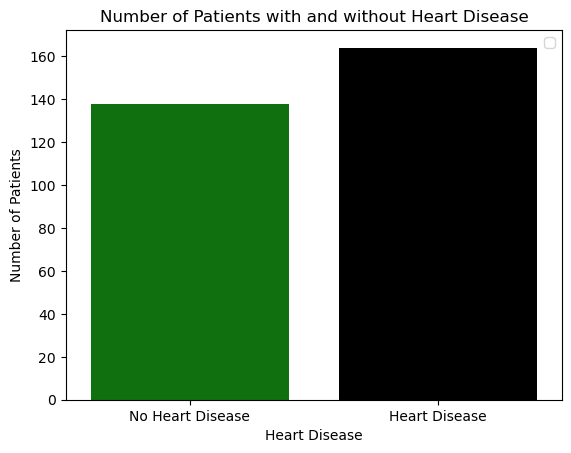

In [211]:
# visulaize number of patients having heart disease and not having heart disease
sns.countplot(x='target', data=data, palette=['green','black'])
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with and without Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.legend()

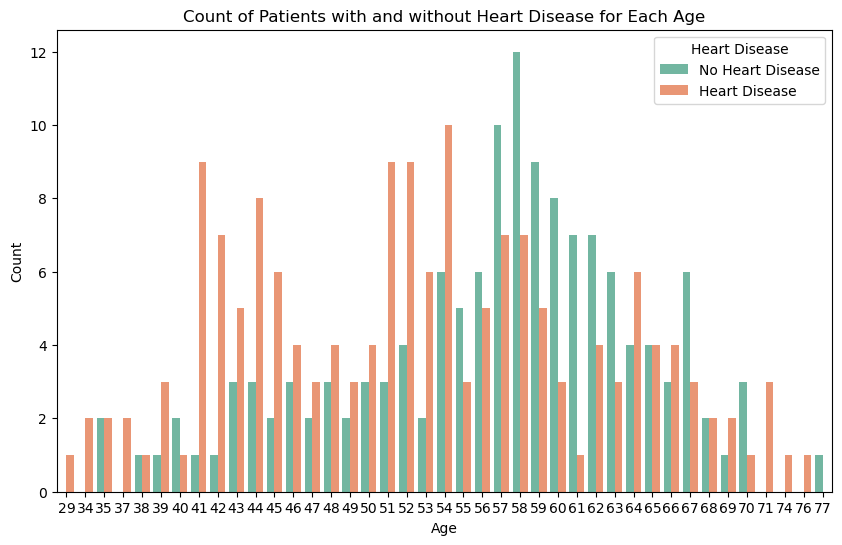

In [212]:
# visualize age whether patient having heart disease or not

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='target', data=data, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Patients with and without Heart Disease for Each Age')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<Axes: >

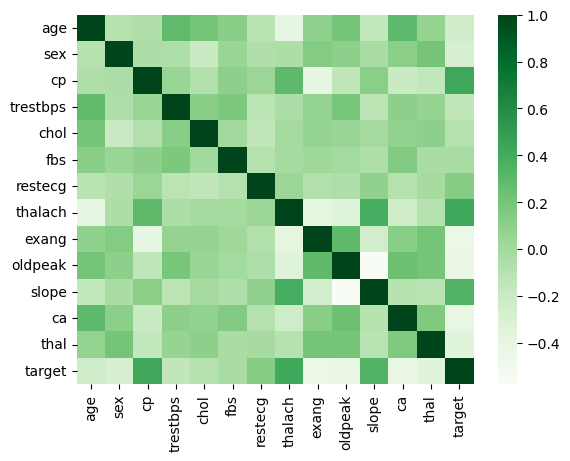

In [213]:
# Visualize correlation between all features using heatmap

sns.heatmap(data.corr(), cmap='Greens')

age :


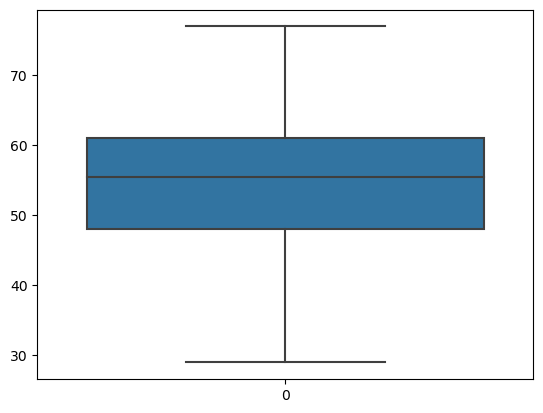

sex :


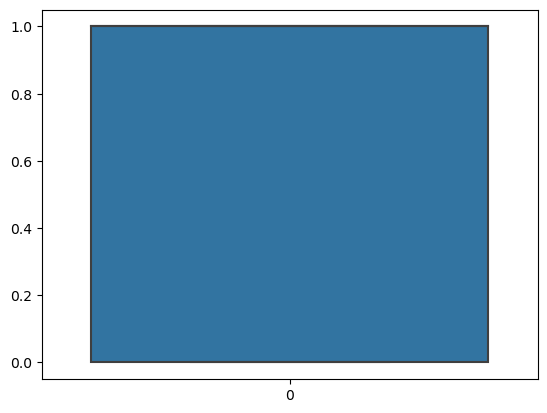

cp :


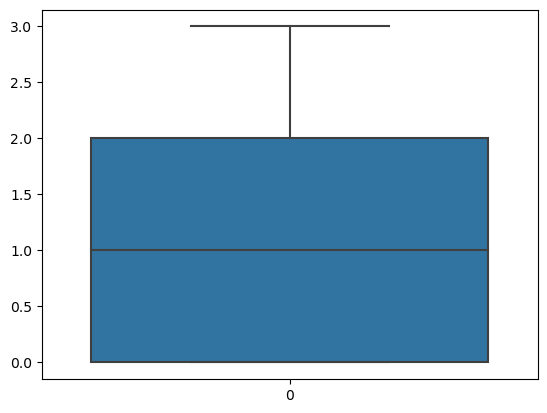

trestbps :


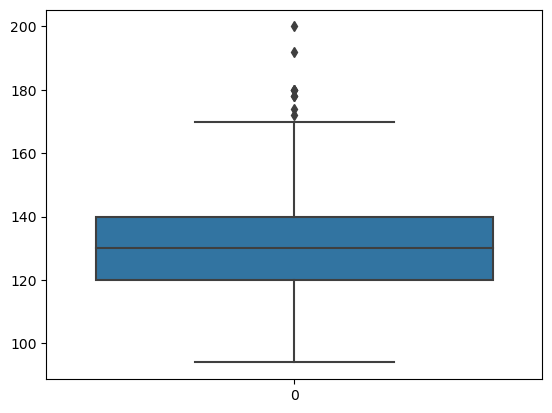

chol :


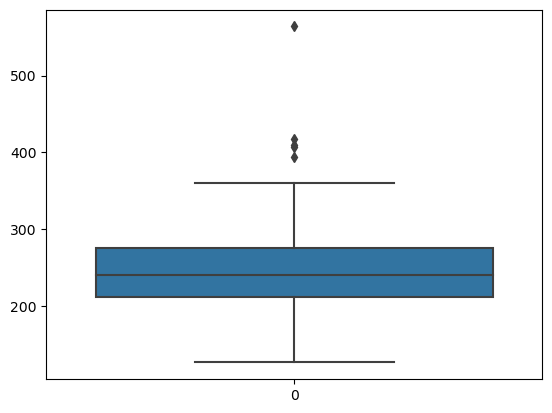

fbs :


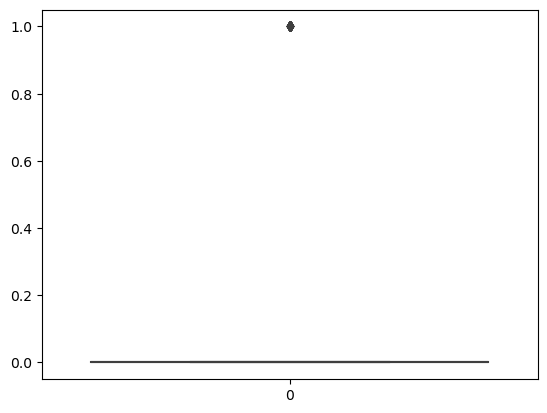

restecg :


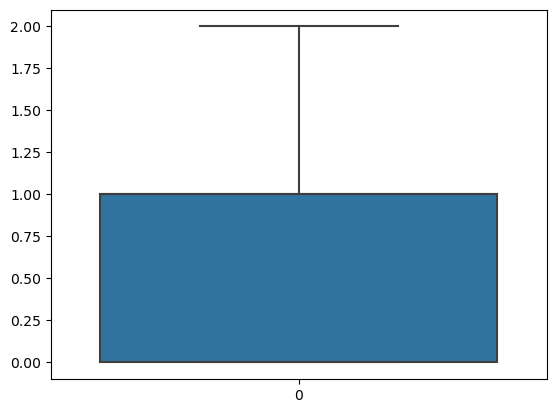

thalach :


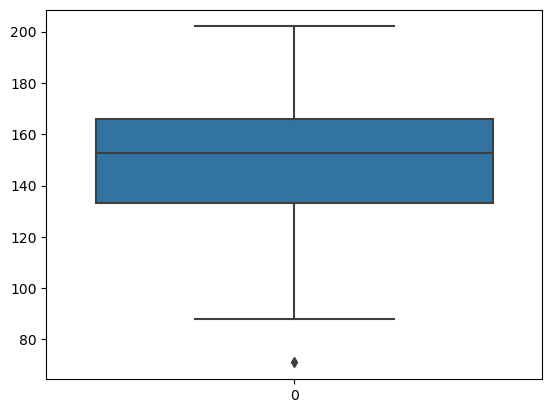

exang :


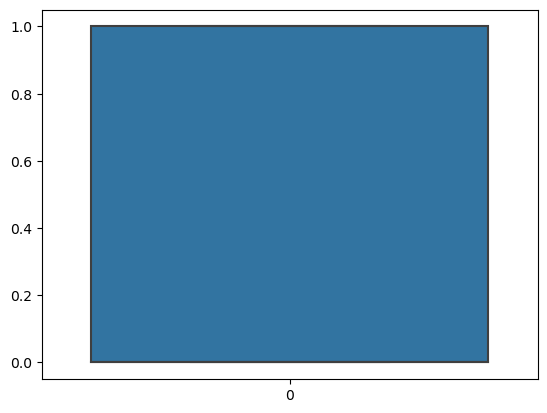

oldpeak :


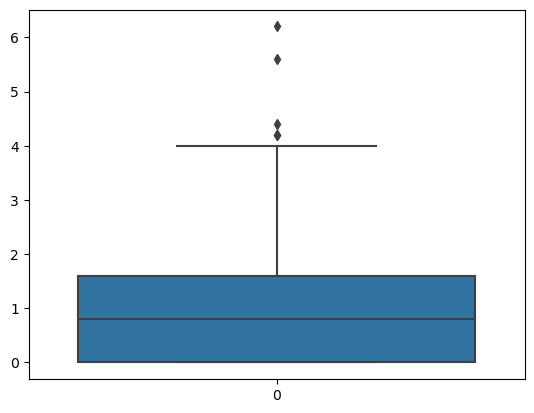

slope :


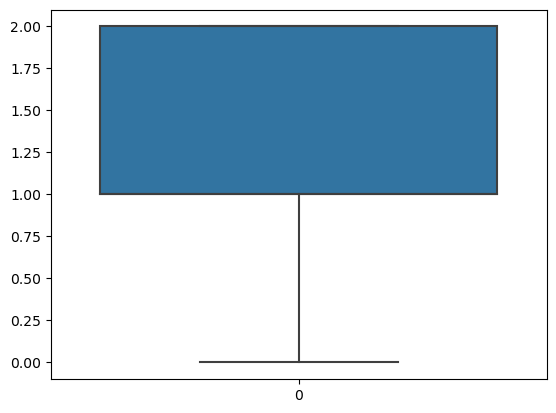

ca :


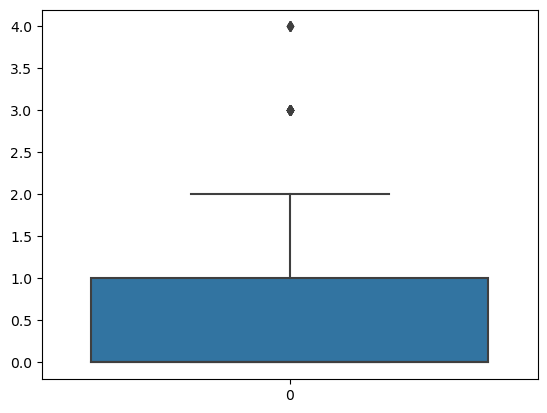

thal :


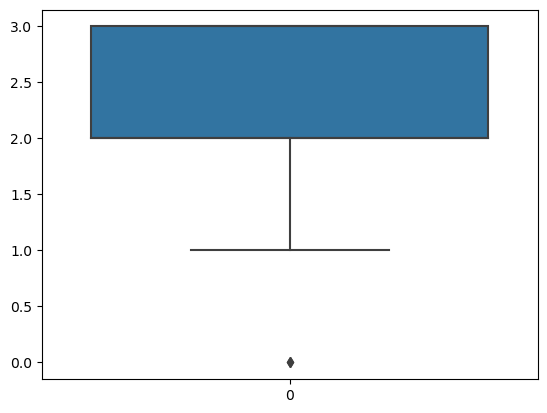

target :


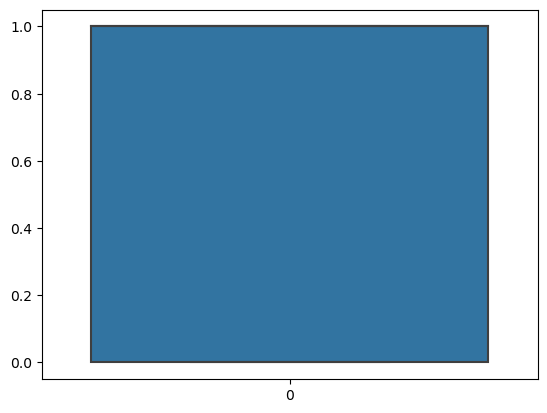

In [214]:
# Checking for Outliers by printing boxplot

for col in data.columns:
    print(col,':')
    sns.boxplot(data[col])
    plt.show()

## Model Building

### Split the data in traning and testing

In [215]:
# X will have all feature other than target
X = pd.DataFrame(data.iloc[:,:-1])

# y will have only target column
y = pd.DataFrame(data.iloc[:,-1])

In [216]:
# Scaling data with help of standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [217]:
X.shape

(302, 13)

In [218]:
y.shape

(302, 1)

In [219]:
# Splitting data into training and testing by 70:30 ratio respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

In [220]:
X_train.shape

(211, 13)

In [221]:
X_test.shape

(91, 13)

In [222]:
y_train.shape

(211, 1)

In [223]:
y_test.shape

(91, 1)

# **Logistic Regression**

In [224]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [225]:
y_pred = logmodel.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix1 = confusion_matrix(y_test,y_pred)
confusion_matrix1

array([[33, 13],
       [ 6, 39]], dtype=int64)

In [227]:
print(accuracy_score(y_pred, y_test)*100)

79.12087912087912


# **Decision Tree**

In [228]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier()

In [229]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [230]:
pred_dt = dt.predict(X_test)

In [231]:
print(accuracy_score(pred_dt, y_test)*100)
print(confusion_matrix(pred_dt, y_test))

69.23076923076923
[[29 11]
 [17 34]]


# **Random Forest**

In [232]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [233]:
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [234]:
print(accuracy_score(pred_rf, y_test)*100)
print(confusion_matrix(pred_rf, y_test))

81.31868131868131
[[35  6]
 [11 39]]


**Random** **Forest** is best model

In [235]:
# Predicting User Input 1
user_input_1 = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Preprocess the user input
user_input_scaled = scaler.transform(user_input_1)

# Make predictions
user_prediction = rf.predict(user_input_scaled)

# Display the prediction
if user_prediction[0] == 1:
    print("The model predicts that the user may have heart disease.")
else:
    print("The model predicts that the user may not have heart disease.")

The model predicts that the user may have heart disease.


In [241]:
# Predicting User Input 2
user_input_2 = [[57, 1, 0, 130, 131, 0, 1, 115, 1, 1.2, 1, 1, 3]]

# Preprocess the user input
user_input_scaled = scaler.transform(user_input_2)

# Make predictions
user_prediction = rf.predict(user_input_scaled)

# Display the prediction
if user_prediction[0] == 1:
    print("The model predicts that the user may have heart disease.")
else:
    print("The model predicts that the user may not have heart disease.")

The model predicts that the user may not have heart disease.
